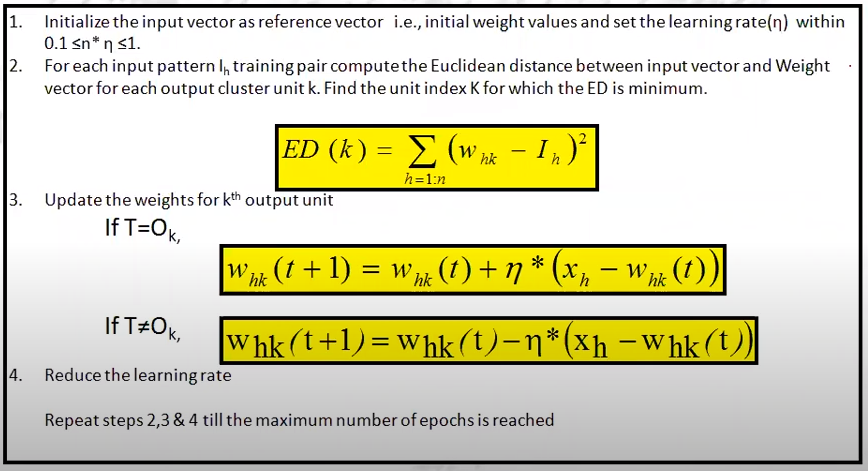

## Importing Libraries

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

## Utility Functions

In [2]:
def find_min(difference_list):
    return np.argmin(difference_list)


def normalize(dataframe):
    for column_name in dataframe.columns:
        x_min = dataframe[column_name].min()
        x_max = dataframe[column_name].max()
        dataframe[column_name] = dataframe[column_name].map(lambda x: (x-x_min)/(x_max-x_min))
    return dataframe


def update_weights(weights,winner,record,learning_rate,operation):
    new_weights = weights
    
    if(operation=='increase'):
        for i in range(len(weights[0])):
            new_weights[winner][i] += learning_rate*(record[i]-weights[winner][i])
        
    elif(operation=='decrease'):
        for i in range(len(weights[0])):
            new_weights[winner][i] -= learning_rate*(record[i]-weights[winner][i])
    else:
        print('non supported operation')
        
    return new_weights

## Reading the dataset

In [3]:
df_temp = pd.read_csv('sitting.csv') #1

df_append = pd.read_csv('lying.csv') #2

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('standing.csv') #3

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('walking.csv') #4

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('standing (1).csv') #5

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('lying (1).csv') #6

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('sitting (1).csv') #7

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('walking (1).csv') #8

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('lying (2).csv') #9

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('walking (2).csv') #10

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('sitting (2).csv') #11

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('standing (2).csv') #12

train_df = df_temp.append(df_append) #train_df


df_temp = pd.read_csv('unknown_lying.csv') #1

df_temp['activity'] = 'lying'

df_append = pd.read_csv('unknown_standing.csv') #2

df_append['activity'] = 'standing'

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('unknown_sitting.csv') #3

df_append['activity'] = 'sitting'

df_temp = df_temp.append(df_append)

df_append = pd.read_csv('unknown_walking.csv') #4

df_append['activity'] = 'walking'

test_df = df_temp.append(df_append)

## Encoding of datasets

In [4]:
test_df

,ax,ay,az,gx,gy,gz,activity
0,9.1156,-0.9379,3.5319,0.0010,-0.0035,0.0029,lying
1,9.1156,-0.8589,3.5008,0.0042,0.0162,0.0034,lying
2,9.1156,-0.9044,3.5247,0.0021,0.0109,-0.0014,lying
3,9.0773,-0.9499,3.4265,-0.0043,-0.0110,0.0013,lying
4,9.1156,-0.8469,3.5056,0.0036,-0.0104,-0.0041,lying
...,...,...,...,...,...,...,...
246,-1.5275,-10.8648,0.2909,-0.6041,-1.4454,0.0782,walking
247,-3.0438,-8.3424,0.2429,-0.0688,-0.2081,0.4058,walking
248,-3.2283,-9.4898,-0.8614,0.2178,1.2225,-0.1593,walking
249,-2.1743,-9.2622,-4.4019,1.6884,-5.9861,-1.3247,walking


In [5]:
le = LabelEncoder()

train_df['activity']=  le.fit_transform(train_df['activity']) 

train_df

,activity,ax,ay,az,gx,gy,gz
0,1,9.6019,-1.4027,0.0010,0.0003,0.1205,0.0151
1,1,9.6858,-1.4170,0.0465,0.0019,0.0608,-0.0105
2,1,9.6043,-1.4003,-0.0948,0.0040,-0.0452,-0.0142
3,1,9.6331,-1.3715,-0.1044,0.0061,0.0384,0.0044
4,1,9.6163,-1.3883,0.0465,-0.0002,0.0635,0.0087
...,...,...,...,...,...,...,...
246,2,0.4584,-9.8467,-0.6122,-0.0003,0.0088,0.0036
247,2,0.6069,-9.8204,-0.5571,-0.0067,-0.0115,0.0079
248,2,0.4320,-9.7940,-0.6697,0.0024,-0.0003,-0.0145
249,2,0.5063,-9.8419,-0.4685,0.0072,0.0040,0.0100


## Training starts

In [6]:
train_df = shuffle(train_df,random_state=100)

input_df = train_df.iloc[:,1:]
input_df = normalize(input_df)
target_list = train_df.iloc[:,0].to_numpy().tolist()

input_df

,ax,ay,az,gx,gy,gz
191,0.937764,0.882234,0.347405,0.340083,0.656586,0.660747
241,0.849643,0.830276,0.404242,0.340349,0.656098,0.661856
249,0.571616,0.408082,0.264520,0.342591,0.534973,0.770690
48,0.490382,0.382810,0.244062,0.271979,0.625870,0.739506
243,0.557243,0.414241,0.243712,0.233472,0.815674,0.560940
...,...,...,...,...,...,...
173,0.570069,0.409111,0.289522,0.339522,0.670083,0.742832
79,0.967100,0.864401,0.284930,0.340349,0.656850,0.661943
102,0.474467,0.505712,0.261677,0.646212,0.000000,0.306440
79,0.515439,0.411933,0.263522,0.341176,0.656792,0.662826


### Number of neurons

In [7]:
input_neurons = len(input_df.columns)

output_neurons = max(target_list)+1

In [8]:
weights = np.random.rand(output_neurons,input_neurons) #row(i) has weights attached to output nueron(i)

print(weights)
print(weights.shape)

[[0.85765085 0.26017245 0.82401855 0.32670779 0.32577517 0.6828859 ]
 [0.5649285  0.54855751 0.33226413 0.49867075 0.60595464 0.19642282]
 [0.85373129 0.78492415 0.34382815 0.13784175 0.15633419 0.86344468]
 [0.38411228 0.5322011  0.88335155 0.64128829 0.704896   0.41159231]]
(4, 6)


# Training

In [9]:
epochs = 50

for epoch in range(epochs):
    count = 0 
    hit_count = 0
    miss_count = 0
    learning_rate = 0.02
    winner_count = [0,0,0,0]
    for index,record in input_df.iterrows():
        input_row = np.asarray(record).reshape(6,1)
        #calculate euclidean distances
        distances = []
        for weight_row in weights:
            distances.append(weight_row.dot(input_row)[0]**2)
        winner = find_min(distances)
        winner_count[winner] += 1
        if(target_list[count] == winner):
            hit_count += 1
            weights = update_weights(weights,winner,record,learning_rate,operation='increase')
        else:
            miss_count += 1
            weights = update_weights(weights,winner,record,learning_rate,operation='decrease')
        count +=1

In [10]:
print(winner_count)
print(hit_count)
print(miss_count)

[102, 1577, 786, 547]
1295
1717


## Testing

In [11]:
test_df = test_df.sample(frac=1)
test_df

,ax,ay,az,gx,gy,gz,activity
69,0.0104,-10.6732,3.8960,0.4655,1.2151,-0.0475,walking
7,3.3880,-3.0843,8.7229,-0.0059,-0.0051,0.0029,sitting
134,3.3593,-3.1298,8.8140,0.0063,0.0114,-0.0003,sitting
31,-1.4436,-9.6719,-0.8805,-0.0182,-0.0164,0.0074,standing
42,3.3737,-3.1418,8.7253,-0.0011,0.0040,0.0002,sitting
...,...,...,...,...,...,...,...
155,-2.3683,-10.2492,-0.7847,0.3275,1.1032,-0.6973,walking
242,9.0965,-0.9068,3.4217,0.0026,0.0024,0.0007,lying
90,3.4096,-3.1633,8.7469,0.0036,0.0082,0.0029,sitting
216,9.1180,-0.8278,3.4529,-0.0043,-0.0078,0.0018,lying


In [12]:
test_df['activity']=  le.fit_transform(test_df['activity']) 
test_df_input = test_df.iloc[:,:-1]
test_df_input = normalize(test_df_input)
target_test_list = test_df.iloc[:,-1].to_numpy().tolist()

In [13]:
count = 0
hit_count = 0
miss_count = 0
winner_count = [0,0,0,0]

for index,record in test_df_input.iterrows():
    input_row = np.asarray(record).reshape(6,1)
    #calculate euclidean distances
    distances = []
    for weight_row in weights:
        distances.append(weight_row.dot(input_row)[0]**2)
        
    winner = find_min(distances)
    winner_count[winner] += 1
    
    if(target_test_list[count] == winner):
        hit_count += 1
    else:
        miss_count += 1
    count +=1

In [14]:
print(winner_count)
print(hit_count)
print(miss_count)

[6, 582, 13, 403]
403
601


In [15]:
print(f'Accuracy is {round(hit_count/(hit_count+miss_count)*100,2)}%')

Accuracy is 40.14%
